In [114]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dtw import dtw

plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']  
plt.rcParams['axes.unicode_minus'] =False 

In [115]:

# 绘图
def double_bar(x1, x2, ind, width, label1, label2):
    fig = plt.figure(figsize=[10,5])
    ax = fig.add_subplot(1, 1, 1)
    # fig, ax = plt.subplots()
    rects1 = ax.bar(
        ind,
        x1,
        width,
    )
    rects2 = ax.bar(
        ind + width,
        x2,
        width,
    )

    # 设置标签、标题和图例
    ax.set_ylabel("Avg Delay")
    ax.set_title("DT Avg Delay")
    ax.set_xticks(ind + width / 2)
    # ax.set_xticklabels(("G1", "G2", "G3", "G4", "G5"))
    ax.legend((rects1[0], rects2[0]), (label1, label2))
    return ax, rects1, rects2

# 添加数值标签
def autolabel(ax, rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{:.1f}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

In [123]:
def calc_indexes(sumo, ctm):
    mae = mean_absolute_error(sumo, ctm)
    mse = mean_squared_error(sumo, ctm)
    dist, cost, acc, path = dtw(np.array(ctm), np.array(sumo), dist=lambda x, y: np.abs(x - y))

# 打印结果
    print("MAE:", mae)
    print("MSE:", mse)
    print("DTW距离:", dist)
    print("DTW对齐路径:", path)

def vis(sumo, ctm, time0:np.array):
    maindf = pd.DataFrame({
    'sumo':sumo,
    'ctm':ctm,
    # 'time':time0
    })
    print(maindf.describe())
    
    plt.plot(time0, sumo, label="sumo", marker=".")
    plt.plot(time0, ctm, label="og_ctm", marker=".")
    plt.legend()
# plt.ylim(0, 30)
    plt.show()


# # 构造数据
    width = 15  # 每个柱子的宽度

# plt.figure(dpi=300)

    ax, rects1, rects2 = double_bar(ctm, sumo, time0, width, 'ctm', 'sumo')
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    plt.show()


    corr = maindf.corr() 
    print(corr)
    sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)
    plt.show()
    cov = maindf.cov()
    print(cov)
    sns.heatmap(cov, cmap='GnBu', annot=True, cbar=False)
    plt.show()


    sns.lmplot(
    data = maindf,
    x='ctm',
    y='sumo',
    order=1
    )
    plt.show()


    temp = sumo[0]
    for i in range(1, len(sumo)):
        sumo[i] += temp
        temp = sumo[i]
    temp = ctm[0]
    for i in range(1, len(ctm)):
        ctm[i] += temp
        temp = ctm[i]
    plt.plot(time0, sumo, label="sumo")
    plt.plot(time0, ctm, label="ctm")
    plt.legend()
    plt.show()


    import numpy as np
    ctm = np.array(ctm).reshape((-1, 1))
    sumo = np.array(sumo)
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
# 训练模型
    model.fit(ctm, sumo)
# 计算预测值
    y_pred = model.predict(ctm)
# 绘制原始数据和拟合直线
    plt.scatter(ctm, sumo)
    plt.plot(ctm, y_pred, color='red')
    plt.show()
    print(model.coef_, model.intercept_)


In [ ]:
# sumo=[4.916436687313045, 4.32464819402042, 4.585994411170272, 4.918053251757599, 5.698892098106941, 5.460721909797618, 5.505356067066772, 4.618916082596014, 6.734249471826392, 6.855095817314461, 5.962608474698871, 5.251203763224334, 5.794156514867605, 5.797102305486308, 5.57793233370376, 5.213151859416871, 5.453349688430824, 6.228130087856089, 4.485736253290264, 5.5534046279251905, 4.240715622285456, 4.734758255283934, 5.141407725113381, 5.341307160555415]
# ctm= [444.4537353515625, 281.48767471313477, 414.7650909423828, 455.313720703125, 499.85240936279297, 438.1914520263672, 469.8202133178711, 322.7828598022461, 617.4297714233398, 818.3271026611328, 546.2598037719727, 283.0583190917969, 406.00963592529297, 644.7670745849609, 701.8075561523438, 426.26644134521484, 562.6451110839844, 481.8013381958008, 410.37879943847656, 372.9133605957031, 372.38250732421875, 443.71997833251953, 573.1111145019531, 709.1233062744141]
# time0 = [547, 603, 658, 711, 772, 826, 883, 940, 1001, 1055, 1111, 1169, 1233, 1291, 1347, 1400, 1458, 1518, 1573, 1627, 1686, 1745, 1805, 1860]
# sumo = [_ * 2 for _ in sumo]
# ctm = [_ / 44 for _ in ctm]

# time0 = np.array(time0)

## p60

In [162]:
sumo=[10.34582457281202, 8.882124361626149, 9.682071934439486, 9.836106503515198, 11.397784196213882, 11.026387879270315, 11.120491544845978, 9.237832165192028, 13.468498943652785, 13.710191634628922, 12.219034148990596, 11.164917521109397, 11.58831302973521, 11.897577546248778, 11.232146773815773, 10.472100413896488, 11.115315090936209, 12.456260175712178, 9.105919261485207, 11.859736970990047, 8.665577691072052, 10.087393170059498, 10.282815450226762, 11.025182407137713]
ctm= [10.101221257990057, 6.397447152571245, 9.42647933959961, 10.348039106889205, 11.360282030972568, 9.95889663696289, 10.677732120860707, 7.335974086414684, 14.032494805075906, 18.598343242298473, 12.414995540272106, 6.433143615722656, 9.22749172557484, 14.653797149658203, 15.950171730735086, 9.687873666936701, 12.787388888272373, 10.950030413540928, 9.326790896329014, 8.475303649902344, 8.463238802823154, 10.084544962102717, 13.025252602317117, 16.116438778963957]
time0= [544, 596, 651, 702, 758, 812, 867, 918, 974, 1030, 1083, 1138, 1194, 1251, 1305, 1358, 1412, 1468, 1525, 1580, 1629, 1684, 1735, 1790]
time0 = np.array(time0)

MAE: 1.7820033810488802
MSE: 6.010442909577274
DTW距离: 38.75536575340466
DTW对齐路径: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10, 10, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 17, 18, 19, 19, 20, 20, 20, 21, 22, 23, 23]))
            sumo        ctm
count  24.000000  24.000000
mean   10.911650  11.076391
std     1.331728   3.106276
min     8.665578   6.397447
25%    10.024572   9.301966
50%    11.070851  10.224630
75%    11.656169  12.846855
max    13.710192  18.598343


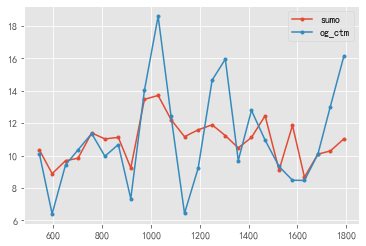

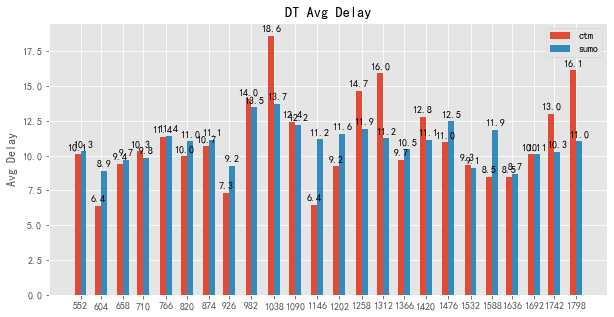

         sumo      ctm
sumo  1.00000  0.62598
ctm   0.62598  1.00000


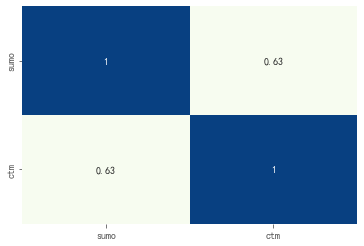

          sumo       ctm
sumo  1.773501  2.589501
ctm   2.589501  9.648949


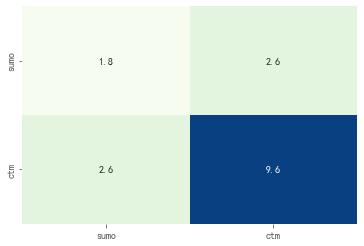

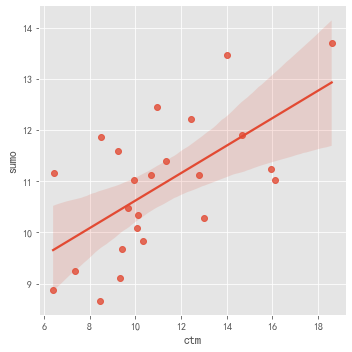

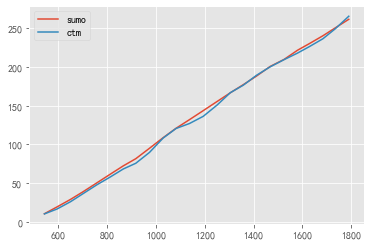

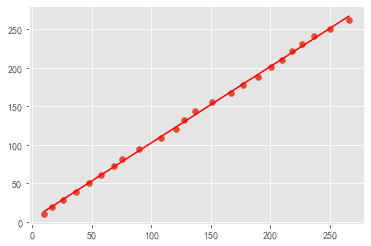

[0.98988827] 3.7086785783264133


In [163]:
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

## p61

In [170]:
sumo=[9.628698481840653, 9.266302786807879, 10.132386757111743, 9.27386537152174, 10.652633639945762, 10.780827242162152, 10.986477539480836, 9.871254091480226, 12.412846516294543, 9.287884556956687, 10.449811412756793, 10.251828686264675, 11.547096643989377, 12.891460130838398, 9.79552476395828, 8.745965280349909, 10.849285360116665, 10.046333193804973, 9.243395012125237, 11.506462666804781, 10.993299163169722, 10.539904869367689, 12.251825268617093, 10.013808725874]
ctm= [3.1414862112565474, 2.953618656505238, 3.6622662977738814, 2.98862023787065, 3.5766783627596768, 3.069620132446289, 2.8542952104048296, 2.670274864543568, 3.82222825830633, 3.58463699167425, 3.6350963332436304, 3.5629643093455923, 4.548126567493785, 4.273382533680309, 4.35197960246693, 4.99860633503307, 4.770528186451305, 3.122989914634011, 3.646499893882058, 3.7342322956431997, 2.6885750076987525, 4.586189443414861, 3.099405115300959, 4.129537669095126]
time0= [542, 594, 649, 699, 751, 805, 857, 909, 964, 1015, 1069, 1121, 1178, 1235, 1288, 1340, 1394, 1448, 1503, 1554, 1607, 1660, 1713, 1767]
time0 = np.array(time0)
ctm = [_ * 3 for _ in ctm]

MAE: 1.679302975293193
MSE: 4.962084223555794
DTW距离: 25.213188879495608
DTW对齐路径: (array([ 0,  0,  0,  1,  2,  2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 22, 22, 23, 23]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  9,  9, 10, 10, 11, 12, 13,
       13, 13, 13, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]))
            sumo        ctm
count  24.000000  24.000000
mean   10.475799  10.933980
std     1.077247   2.030701
min     8.745965   8.010825
25%     9.753818   9.275877
50%    10.350820  10.829600
75%    10.988183  12.496497
max    12.891460  14.995819


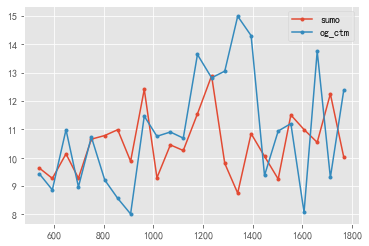

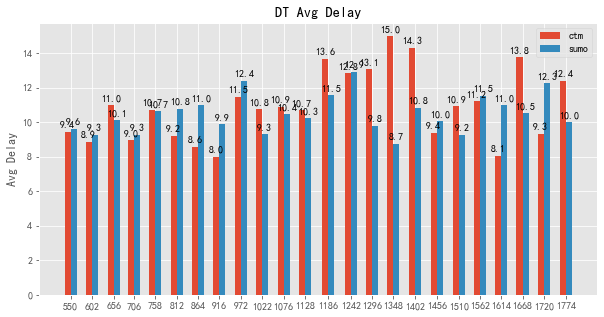

          sumo       ctm
sumo  1.000000  0.074383
ctm   0.074383  1.000000


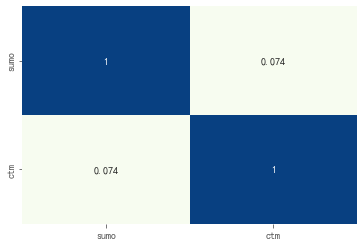

          sumo       ctm
sumo  1.160460  0.162718
ctm   0.162718  4.123746


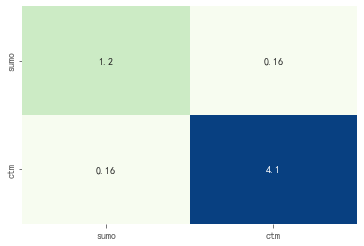

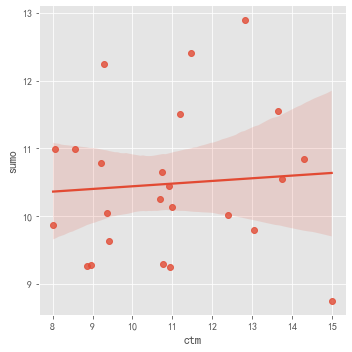

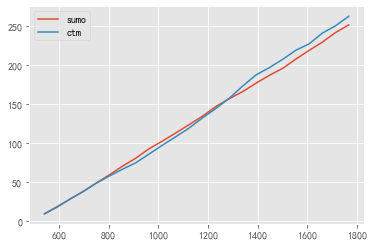

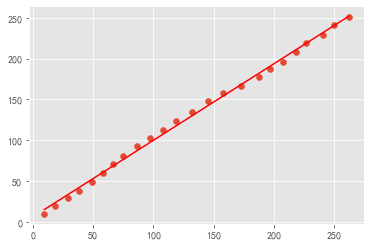

[0.93593616] 6.219811594975823


In [171]:
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

## p62

MAE: 3.7328512009007753
MSE: 19.50043359376126
DTW距离: 56.23656102669959
DTW对齐路径: (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       23, 23]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10, 10, 11, 11, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 21,
       22, 23]))
            sumo        ctm
count  24.000000  24.000000
mean   13.352030  12.102876
std     1.958069   4.507800
min     9.977880   6.832762
25%    11.834769   8.487634
50%    13.650373  10.059863
75%    14.608423  15.707996
max    16.458952  21.372858


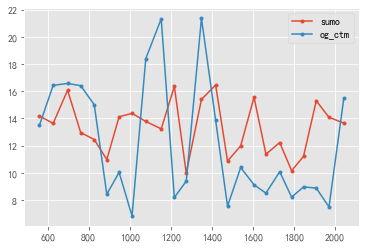

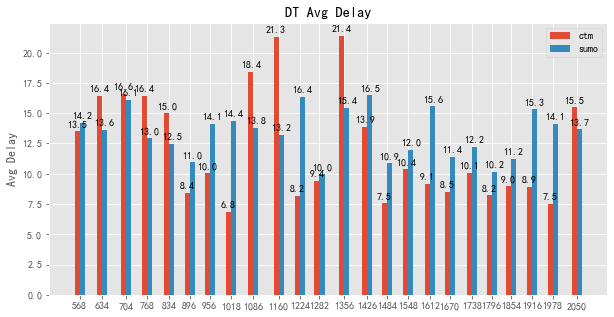

          sumo       ctm
sumo  1.000000  0.307834
ctm   0.307834  1.000000


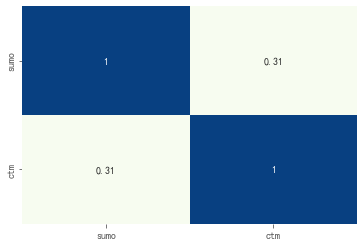

          sumo        ctm
sumo  3.834033   2.717120
ctm   2.717120  20.320256


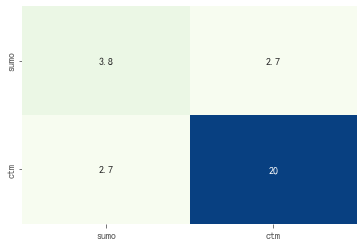

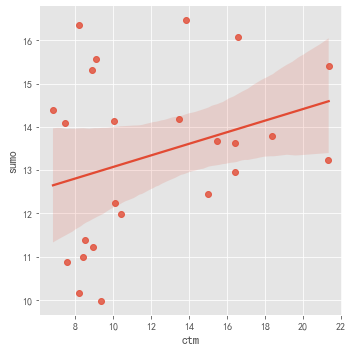

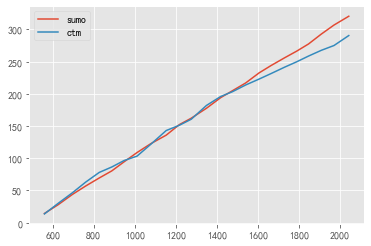

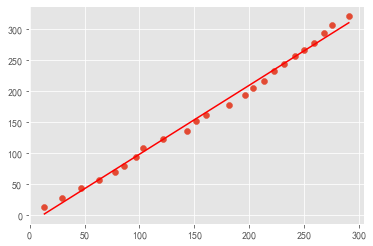

[1.11012129] -12.482802135344173


In [173]:
sumo=[14.186267819322198, 13.636754460580226, 16.078437047458475, 12.963495547865334, 12.453024443152316, 10.97868438025182, 14.126407652873832, 14.377114143254154, 13.780291618517744, 13.235101135564877, 16.354754249168366, 9.977880222871594, 15.402123251470293, 16.458952436178496, 10.867872466868757, 11.988792892898779, 15.558360567344382, 11.372699044551387, 12.230201134974802, 10.161744552224155, 11.209988179650257, 15.302350541658411, 14.083433242881098, 13.663991537098264]
ctm= [3.374750180677934, 4.109826521439985, 4.144081635908647, 4.103205420754173, 3.752802935513583, 2.106647924943404, 2.5087748874317515, 1.708190549503673, 4.601482911543413, 5.331518433310769, 2.0474635470997202, 2.3473457856611772, 5.34321438182484, 3.4664338285272773, 1.8872885270552202, 2.598747556859797, 2.2810324755581943, 2.1269952167164194, 2.521156831221147, 2.053482315757058, 2.2421305829828437, 2.2193733128634365, 1.8730460513721814, 3.8682634180242363]
time0= [560, 627, 697, 761, 827, 888, 948, 1011, 1078, 1153, 1217, 1275, 1349, 1418, 1476, 1540, 1605, 1663, 1730, 1788, 1846, 1908, 1970, 2042]
time0 = np.array(time0)
ctm = [_ * 4 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)